In [192]:
### Libraries
from pipelines.experimental_modeling_pipeline import DiabetesPreprocessing as dp
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

dp = dp("C:/Users/keimp/")

# Label creation

In [203]:
df = pd.read_csv("C:/Users/keimp/NHS/Data_files/Labeling/asthma_first_occurence_dates.csv")

In [204]:
df = df.merge(pd.read_csv("C:/Users/keimp/NHS/Data_files/Grouped_files/replace/Demographics.csv"), on="Participant ID")

In [205]:
df.head()

,Participant ID,Date J45 first reported (asthma),Date J46 first reported (status asthmaticus),Age at recruitment,Sex,Ethnic background | Instance 0,Ethnic background | Instance 1,Ethnic background | Instance 2,Ethnic background | Instance 3
0,1078283,NaN,NaN,65.0,Female,British,British,NaN,NaN
1,5170903,NaN,NaN,69.0,Male,British,NaN,NaN,NaN
2,5723318,NaN,NaN,63.0,Male,British,NaN,NaN,NaN
3,2903197,NaN,NaN,63.0,Male,British,NaN,NaN,NaN
4,5732491,NaN,NaN,62.0,Male,British,NaN,NaN,NaN


Delete participants with alternative coding: low number not relevant

In [206]:
coding819 = pd.read_csv("C:/Users/keimp/NHS/Data_files/coding/coding819.tsv", sep="\t")

In [207]:
coding = coding819["coding"].tolist()
meaning = coding819["meaning"].tolist()

In [208]:
df.shape

(502364, 9)

In [209]:
def delete_coding(i):
    if i in meaning:
        return 0
    return 1
    
df= df[df["Date J45 first reported (asthma)"].apply(delete_coding) ==1]
df= df[df["Date J46 first reported (status asthmaticus)"].apply(delete_coding) ==1]

In [210]:
df.shape

(502345, 9)

Construct label on earliest date

In [211]:
df["all_asthma"] = df[["Date J45 first reported (asthma)", "Date J46 first reported (status asthmaticus)"]].apply(dp.earliest_date, 1)

C:\Users\keimp\NHS\Code\experimental_modeling\COPD\..\pipelines\experimental_modeling_pipeline.py:742: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  return pd.np.nan


In [212]:
df.count()

Participant ID                                  502345
Date J45 first reported (asthma)                 74050
Date J46 first reported (status asthmaticus)       547
Age at recruitment                              502344
Sex                                             502345
Ethnic background | Instance 0                  501446
Ethnic background | Instance 1                   20334
Ethnic background | Instance 2                   14100
Ethnic background | Instance 3                      86
all_asthma                                       74073
dtype: int64

Add assesment date

In [213]:
df = df.merge(pd.read_csv("C:/Users/keimp/NHS/Data_files/Grouped_files/replace/Dates_attending_assessment_centers_participant.csv"), on="Participant ID")

In [214]:
df.head()

,Participant ID,Date J45 first reported (asthma),Date J46 first reported (status asthmaticus),Age at recruitment,Sex,Ethnic background | Instance 0,Ethnic background | Instance 1,Ethnic background | Instance 2,Ethnic background | Instance 3,all_asthma,Date of attending assessment centre | Instance 0,Date of attending assessment centre | Instance 1,Date of attending assessment centre | Instance 2,Date of attending assessment centre | Instance 3,Year of birth
0,1078283,NaN,NaN,65.0,Female,British,British,NaN,NaN,NaT,2007-12-18,2013-04-10,NaN,NaN,1942.0
1,5170903,NaN,NaN,69.0,Male,British,NaN,NaN,NaN,NaT,2008-01-07,NaN,NaN,NaN,1938.0
2,5723318,NaN,NaN,63.0,Male,British,NaN,NaN,NaN,NaT,2008-04-04,NaN,NaN,NaN,1944.0
3,2903197,NaN,NaN,63.0,Male,British,NaN,NaN,NaN,NaT,2010-07-16,NaN,NaN,NaN,1946.0
4,5732491,NaN,NaN,62.0,Male,British,NaN,NaN,NaN,NaT,2009-10-03,NaN,NaN,NaN,1947.0


After first assesment date

In [215]:
df['Date of attending assessment centre | Instance 0']= pd.to_datetime(df['Date of attending assessment centre | Instance 0'])

In [216]:
def binary_assesment(l):
    if l[0] > l[1] and not pd.isnull(l[0]) and not pd.isnull(l[1]):
        return 1
    return 0
df["binary_assesment"] = df[["all_asthma", 'Date of attending assessment centre | Instance 0']].apply(binary_assesment, 1)

In [217]:
df["binary_assesment"].value_counts()

0    487424
1     14921
Name: binary_assesment, dtype: int64

In [218]:
df["all_asthma"].notna().sum()

74073

In [219]:
def age_asthma(l):
    try:
        return l[0].year - l[1]
    except:
        return pd.np.nan
df["age_asthma"] = df[["all_asthma", "Year of birth"]].apply(age_asthma, 1)

(array([ 840., 1119., 1146., 1075., 1430., 1463., 1088., 1267.,  852.,
        1220., 1424.,  842.,  808.,  629.,  740.,  711.,  389.,  504.,
         524.,  578., 1526.,  525.,  528.,  897.,  909.,  503.,  627.,
         617., 1240., 1343.,  558.,  646.,  556., 1169., 1276.,  676.,
         688.,  746., 1759., 1891., 1773.,  714., 1456., 1633.,  799.,
         952., 1056., 1693., 1809., 1077., 1075.,  972., 1429., 1562.,
        1145., 1138., 1201., 1322., 1285., 1015., 2000.,  988.,  889.,
         855.,  821.,  776.,  713.,  674.,  616.,  611.,  519.,  521.,
         390.,  343.,  319.,  234.,  143.,  114.,   73.,   39.]),
 array([ 0.  ,  1.05,  2.1 ,  3.15,  4.2 ,  5.25,  6.3 ,  7.35,  8.4 ,
         9.45, 10.5 , 11.55, 12.6 , 13.65, 14.7 , 15.75, 16.8 , 17.85,
        18.9 , 19.95, 21.  , 22.05, 23.1 , 24.15, 25.2 , 26.25, 27.3 ,
        28.35, 29.4 , 30.45, 31.5 , 32.55, 33.6 , 34.65, 35.7 , 36.75,
        37.8 , 38.85, 39.9 , 40.95, 42.  , 43.05, 44.1 , 45.15, 46.2 ,
        47.

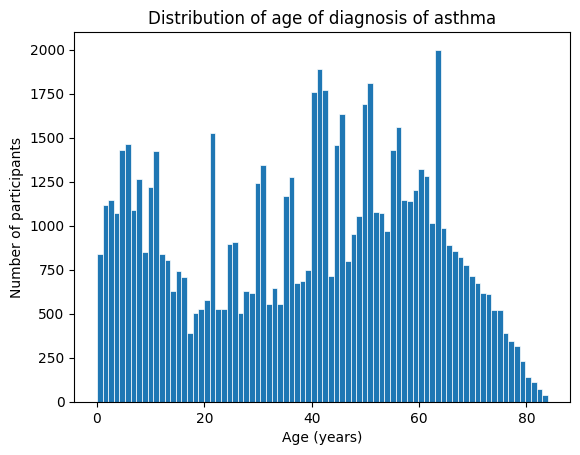

In [220]:
fig, ax = plt.subplots()
plt.title("Distribution of age of diagnosis of asthma")
plt.xlabel("Age (years)")
plt.ylabel("Number of participants")
ax.hist(df["age_asthma"],bins=80 ,linewidth=0.5, edgecolor="white")

About 17% of cases of asthma occur after diagnosis date, with around 14k participants possible target fo modeling

Due to age being a clinical factor subtyping can not be done on participants to be diagnosed

### Analysis of different variables related to asthma

#### Eosinophil

In [221]:
#obtain data
df = df.merge(pd.read_csv("C:/Users/keimp/NHS/Data_files/Separate_files/coding_option_replace/Blood_biomarkers_3.csv"), on="Participant ID")

In [237]:
#asthma binary
df["asthma_binary"] = df["all_asthma"].apply(dp.nan_to_binary)
df["asthma_binary"].value_counts()

0    428272
1     74073
Name: asthma_binary, dtype: int64

(array([2.8011e+04, 6.2348e+04, 1.4280e+05, 3.4155e+04, 6.6486e+04,
        3.5104e+04, 1.0067e+04, 5.3970e+03, 1.0040e+04, 2.7280e+03,
        3.9680e+03, 2.2620e+03, 5.8400e+02, 1.0210e+03, 2.8800e+02,
        2.3900e+02, 4.0900e+02, 9.8000e+01, 2.5300e+02]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 <BarContainer object of 19 artists>)

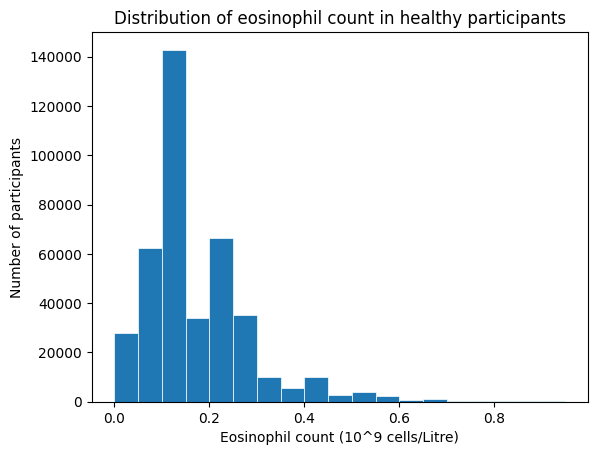

In [246]:
fig, ax = plt.subplots()
plt.title("Distribution of eosinophil count in healthy participants")
plt.xlabel("Eosinophil count (10^9 cells/Litre)")
plt.ylabel("Number of participants")
ax.hist(df["Eosinophill count | Instance 0"].loc[df["asthma_binary"] == 0] ,bins=list(np.arange(0,1,0.05)), linewidth=0.5, edgecolor="white")

(array([ 2897.,  6684., 19009.,  5892., 13155.,  8725.,  2815.,  1627.,
         3470.,  1046.,  1750.,  1085.,   281.,   560.,   142.,   147.,
          240.,    68.,   166.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 <BarContainer object of 19 artists>)

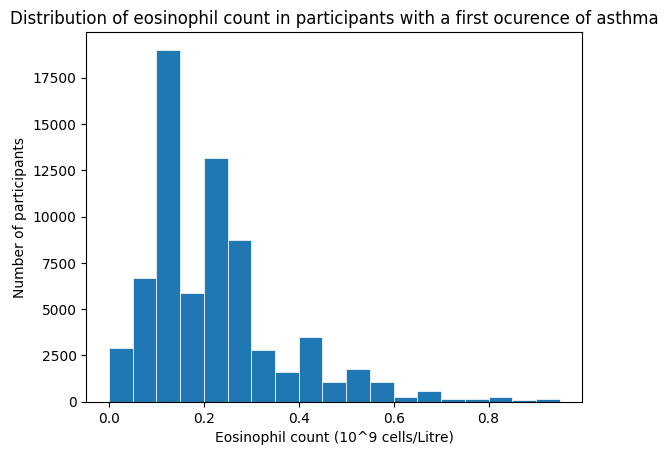

In [248]:
fig, ax = plt.subplots()
plt.title("Distribution of eosinophil count in participants with a first ocurence of asthma")
plt.xlabel("Eosinophil count (10^9 cells/Litre)")
plt.ylabel("Number of participants")
ax.hist(df["Eosinophill count | Instance 0"].loc[df["asthma_binary"] == 1] ,bins=list(np.arange(0,1,0.05)), linewidth=0.5, edgecolor="white")

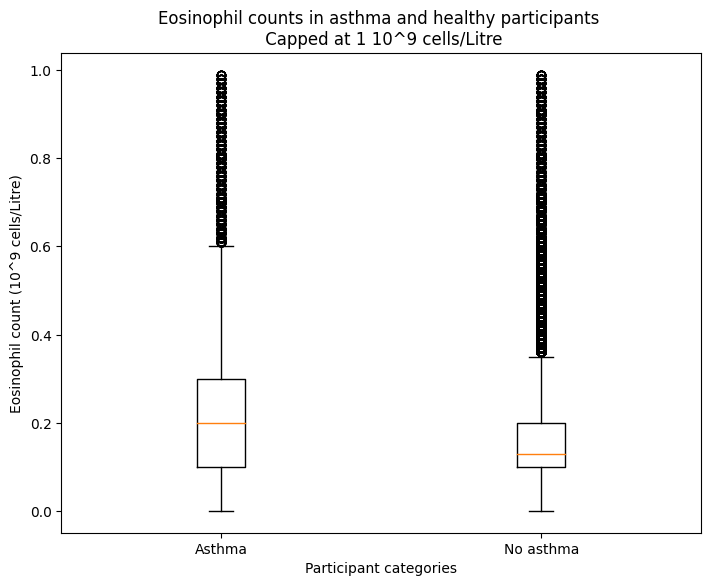

In [283]:
data = [[x for x in df["Eosinophill count | Instance 0"].loc[df["asthma_binary"] == 1].tolist() if str(x) != 'nan' and x<1], [x for x in df["Eosinophill count | Instance 0"].loc[df["asthma_binary"] == 0].tolist() if str(x) != 'nan' and x<1]]
fig = plt.figure()
        
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Eosinophil counts in asthma and healthy participants \n Capped at 1 10^9 cells/Litre")
ax.set_ylabel("Eosinophil count (10^9 cells/Litre)")
ax.set_xlabel("Participant categories")
# Creating plot
bp = ax.boxplot(data, labels=['Asthma', 'No asthma'])

Data shows more participants in the right tail of the asthma participants, indicating a subset of asthma patients have incereased eosinphil counts.
This does not, however, take into account other comorbilities in the healthy cohort.

#### Breathing symptomes

In [276]:
#obtain data
df = df.merge(pd.read_csv("C:/Users/keimp/NHS/Data_files/Grouped_files/replace/Symptoms_and_pain.csv"), on="Participant ID")

<BarContainer object of 4 artists>

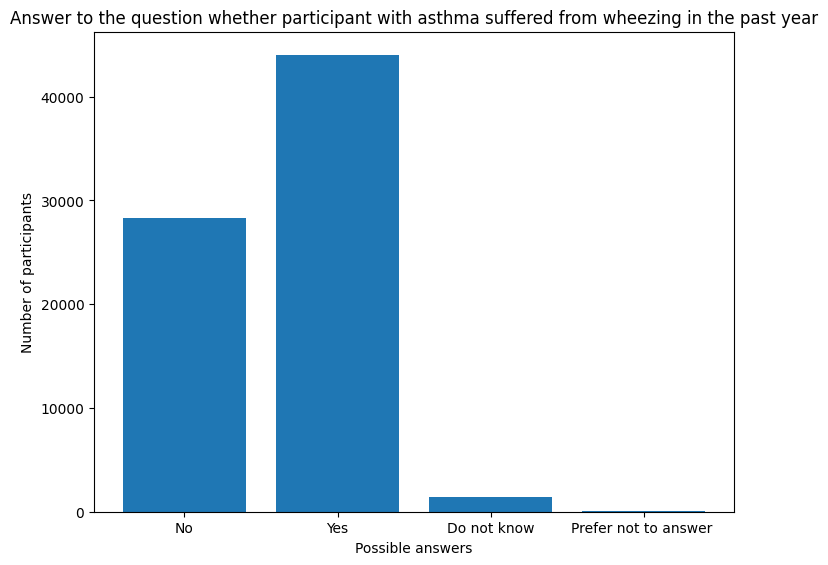

In [284]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Answer to the question whether participant with asthma suffered from wheezing in the past year")
ax.set_ylabel("Number of participants")
ax.set_xlabel("Possible answers")
labels = ["No", "Yes", "Do not know", "Prefer not to answer "]
data = [df["Wheeze or whistling in the chest in last year | Instance 0"].loc[df["asthma_binary"] == 1].value_counts()["No"], df["Wheeze or whistling in the chest in last year | Instance 0"].loc[df["asthma_binary"] == 1].value_counts()["Yes"],
       df["Wheeze or whistling in the chest in last year | Instance 0"].loc[df["asthma_binary"] == 1].value_counts()["Do not know"], df["Wheeze or whistling in the chest in last year | Instance 0"].loc[df["asthma_binary"] == 1].value_counts()["Prefer not to answer"]]
ax.bar(labels,data)

<BarContainer object of 4 artists>

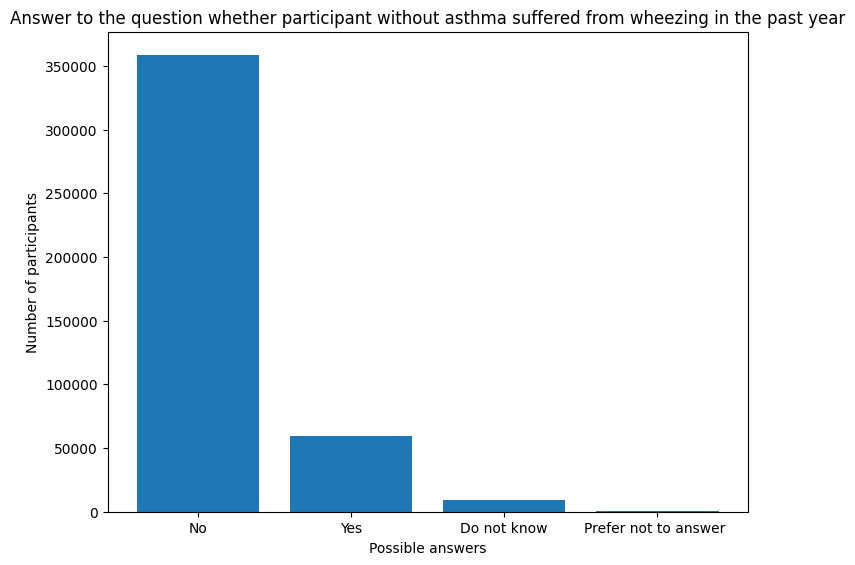

In [286]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Answer to the question whether participant without asthma suffered from wheezing in the past year")
ax.set_ylabel("Number of participants")
ax.set_xlabel("Possible answers")
labels = ["No", "Yes", "Do not know", "Prefer not to answer "]
data = [df["Wheeze or whistling in the chest in last year | Instance 0"].loc[df["asthma_binary"] == 0].value_counts()["No"], df["Wheeze or whistling in the chest in last year | Instance 0"].loc[df["asthma_binary"] == 0].value_counts()["Yes"],
       df["Wheeze or whistling in the chest in last year | Instance 0"].loc[df["asthma_binary"] == 0].value_counts()["Do not know"], df["Wheeze or whistling in the chest in last year | Instance 0"].loc[df["asthma_binary"] == 0].value_counts()["Prefer not to answer"]]
ax.bar(labels,data)

<BarContainer object of 4 artists>

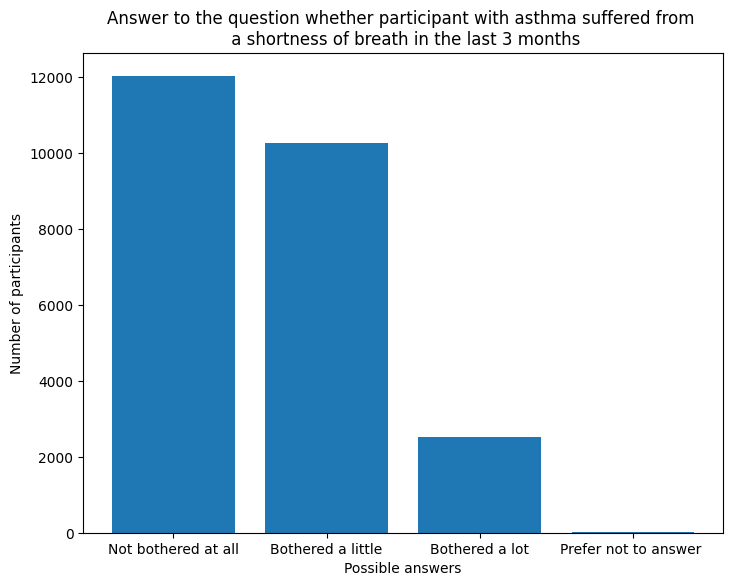

In [290]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Answer to the question whether participant with asthma suffered from \n a shortness of breath in the last 3 months")
ax.set_ylabel("Number of participants")
ax.set_xlabel("Possible answers")
labels = ["Not bothered at all", "Bothered a little", "Bothered a lot", "Prefer not to answer "]
data = [df["Degree bothered by shortness of breath in the last 3 months"].loc[df["asthma_binary"] == 1].value_counts()["Not bothered at all"], df["Degree bothered by shortness of breath in the last 3 months"].loc[df["asthma_binary"] == 1].value_counts()["Bothered a little"],
       df["Degree bothered by shortness of breath in the last 3 months"].loc[df["asthma_binary"] == 1].value_counts()["Bothered a lot"], df["Degree bothered by shortness of breath in the last 3 months"].loc[df["asthma_binary"] == 1].value_counts()["Prefer not to answer"]]
ax.bar(labels,data)

<BarContainer object of 4 artists>

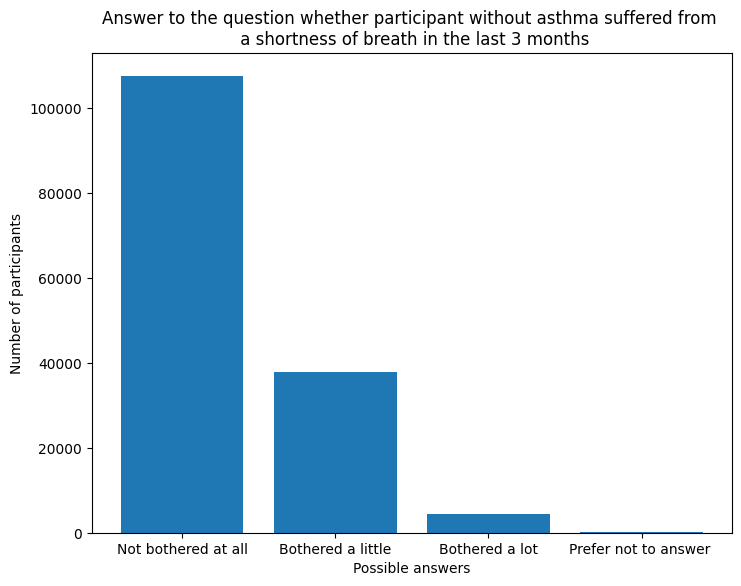

In [291]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Answer to the question whether participant without asthma suffered from \n a shortness of breath in the last 3 months")
ax.set_ylabel("Number of participants")
ax.set_xlabel("Possible answers")
labels = ["Not bothered at all", "Bothered a little", "Bothered a lot", "Prefer not to answer "]
data = [df["Degree bothered by shortness of breath in the last 3 months"].loc[df["asthma_binary"] == 0].value_counts()["Not bothered at all"], df["Degree bothered by shortness of breath in the last 3 months"].loc[df["asthma_binary"] == 0].value_counts()["Bothered a little"],
       df["Degree bothered by shortness of breath in the last 3 months"].loc[df["asthma_binary"] == 0].value_counts()["Bothered a lot"], df["Degree bothered by shortness of breath in the last 3 months"].loc[df["asthma_binary"] == 0].value_counts()["Prefer not to answer"]]
ax.bar(labels,data)

<BarContainer object of 4 artists>

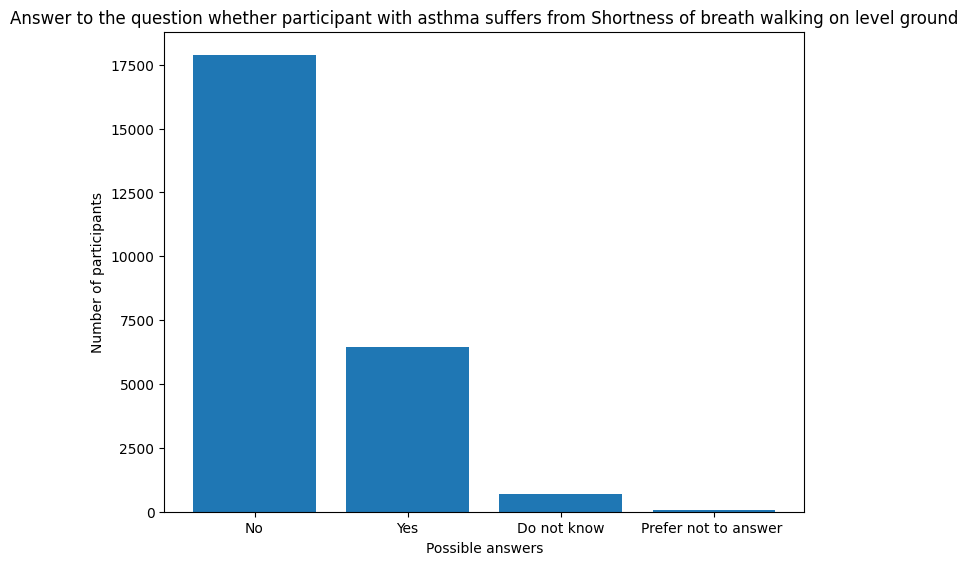

In [295]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Answer to the question whether participant with asthma suffers from Shortness of breath walking on level ground")
ax.set_ylabel("Number of participants")
ax.set_xlabel("Possible answers")
labels = ["No", "Yes", "Do not know", "Prefer not to answer "]
data = [df["Shortness of breath walking on level ground | Instance 0"].loc[df["asthma_binary"] == 1].value_counts()["No"], df["Shortness of breath walking on level ground | Instance 0"].loc[df["asthma_binary"] == 1].value_counts()["Yes"],
       df["Shortness of breath walking on level ground | Instance 0"].loc[df["asthma_binary"] == 1].value_counts()["Do not know"], df["Shortness of breath walking on level ground | Instance 0"].loc[df["asthma_binary"] == 1].value_counts()["Prefer not to answer"]]
ax.bar(labels,data)

<BarContainer object of 4 artists>

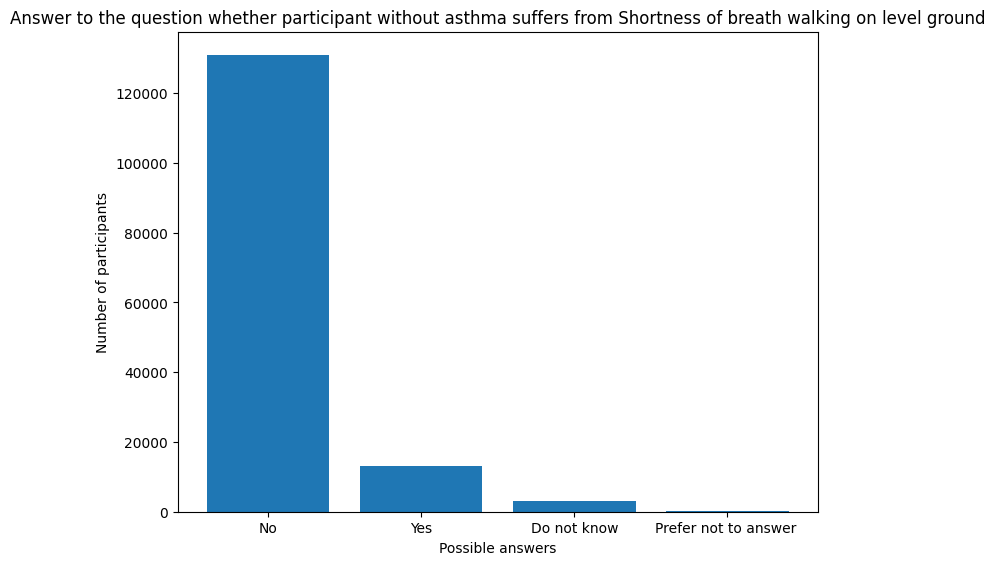

In [297]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Answer to the question whether participant without asthma suffers from Shortness of breath walking on level ground")
ax.set_ylabel("Number of participants")
ax.set_xlabel("Possible answers")
labels = ["No", "Yes", "Do not know", "Prefer not to answer "]
data = [df["Shortness of breath walking on level ground | Instance 0"].loc[df["asthma_binary"] == 0].value_counts()["No"], df["Shortness of breath walking on level ground | Instance 0"].loc[df["asthma_binary"] == 0].value_counts()["Yes"],
       df["Shortness of breath walking on level ground | Instance 0"].loc[df["asthma_binary"] == 0].value_counts()["Do not know"], df["Shortness of breath walking on level ground | Instance 0"].loc[df["asthma_binary"] == 0].value_counts()["Prefer not to answer"]]
ax.bar(labels,data)

Asthma only

([0, 1, 2, 3, 4],
 [Text(0, 0, 'No symptomes'),
  Text(1, 0, 'All symptomes (Bothered a lot)'),
  Text(2, 0, 'All symptomes (Bothered a little)'),
  Text(3, 0, 'Only wheezing'),
  Text(4, 0, 'Only wheezing (bothered a little)')])

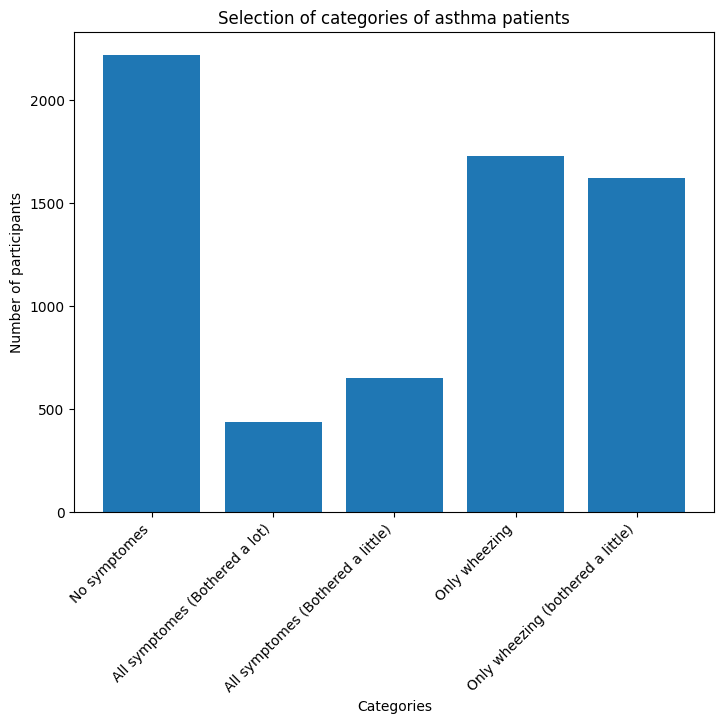

In [313]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Selection of categories of asthma patients")
ax.set_ylabel("Number of participants")
ax.set_xlabel("Categories")
labels = ["No symptomes", "All symptomes (Bothered a lot)", "All symptomes (Bothered a little)", "Only wheezing", "Only wheezing (bothered a little)"]
data = [df.loc[((df["asthma_binary"] == 1) & (df["Shortness of breath walking on level ground | Instance 0"] == "No") & (df["Degree bothered by shortness of breath in the last 3 months"] == "Not bothered at all") & (df["Wheeze or whistling in the chest in last year | Instance 0"] == "No"))].shape[0], 
        df.loc[((df["asthma_binary"] == 1) & (df["Shortness of breath walking on level ground | Instance 0"] == "Yes") & (df["Degree bothered by shortness of breath in the last 3 months"] == "Bothered a lot") & (df["Wheeze or whistling in the chest in last year | Instance 0"] == "Yes"))].shape[0],
        df.loc[((df["asthma_binary"] == 1) & (df["Shortness of breath walking on level ground | Instance 0"] == "Yes") & (df["Degree bothered by shortness of breath in the last 3 months"] == "Bothered a little") & (df["Wheeze or whistling in the chest in last year | Instance 0"] == "Yes"))].shape[0],
       df.loc[((df["asthma_binary"] == 1) & (df["Shortness of breath walking on level ground | Instance 0"] == "No") & (df["Degree bothered by shortness of breath in the last 3 months"] == "Not bothered at all") & (df["Wheeze or whistling in the chest in last year | Instance 0"] == "Yes"))].shape[0],
       df.loc[((df["asthma_binary"] == 1) & (df["Shortness of breath walking on level ground | Instance 0"] == "No") & (df["Degree bothered by shortness of breath in the last 3 months"] == "Bothered a little") & (df["Wheeze or whistling in the chest in last year | Instance 0"] == "Yes"))].shape[0]]
ax.bar(labels,data)
plt.xticks(rotation=45, ha='right')

Categories are non-distinguishable

### Smoking

In [315]:
#obtain data
df = df.merge(pd.read_csv("C:/Users/keimp/NHS/Data_files/Grouped_files/replace/Smoking.csv"), on="Participant ID")

C:\Users\keimp\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3139: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<BarContainer object of 4 artists>

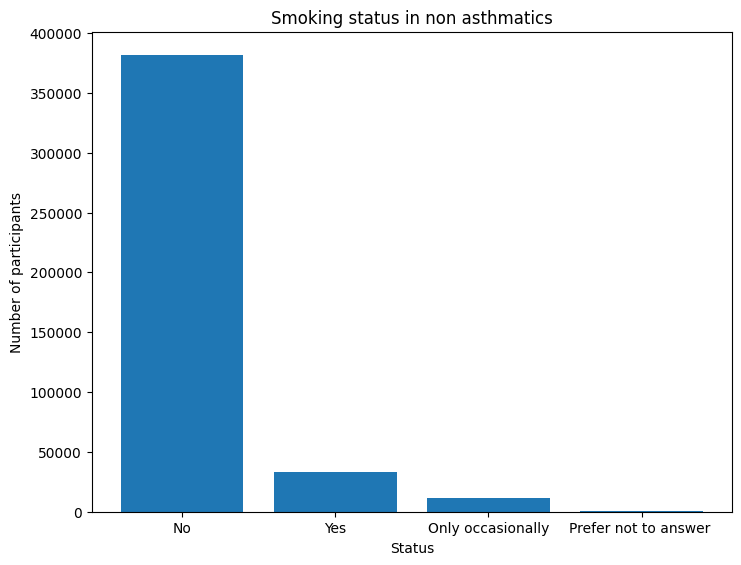

In [321]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Smoking status in non asthmatics")
ax.set_ylabel("Number of participants")
ax.set_xlabel("Status")
labels = ["No", "Yes", "Only occasionally", "Prefer not to answer "]
data = [df["Current tobacco smoking | Instance 0"].loc[df["asthma_binary"] == 0].value_counts()["No"], 
        df["Current tobacco smoking | Instance 0"].loc[df["asthma_binary"] == 0].value_counts()["Yes, on most or all days"],
       df["Current tobacco smoking | Instance 0"].loc[df["asthma_binary"] == 0].value_counts()["Only occasionally"], 
        df["Current tobacco smoking | Instance 0"].loc[df["asthma_binary"] == 0].value_counts()["Prefer not to answer"]]
ax.bar(labels,data)

<BarContainer object of 4 artists>

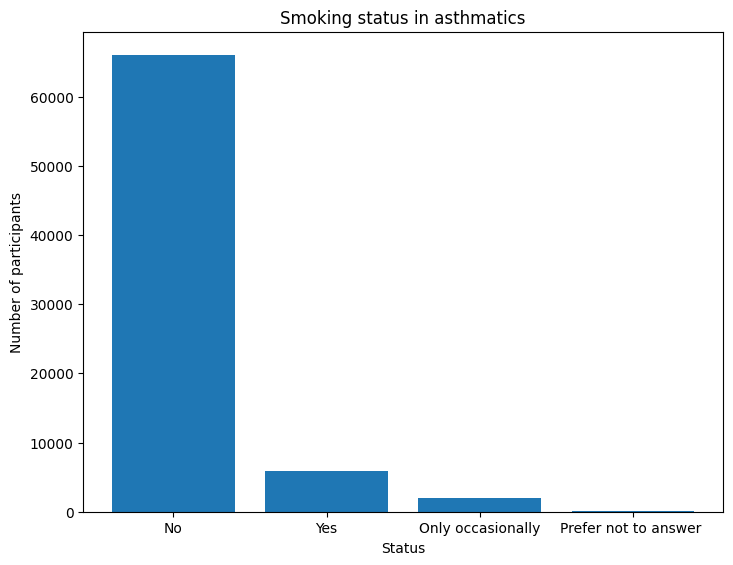

In [322]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Smoking status in asthmatics")
ax.set_ylabel("Number of participants")
ax.set_xlabel("Status")
labels = ["No", "Yes", "Only occasionally", "Prefer not to answer "]
data = [df["Current tobacco smoking | Instance 0"].loc[df["asthma_binary"] == 1].value_counts()["No"], 
        df["Current tobacco smoking | Instance 0"].loc[df["asthma_binary"] == 1].value_counts()["Yes, on most or all days"],
       df["Current tobacco smoking | Instance 0"].loc[df["asthma_binary"] == 1].value_counts()["Only occasionally"], 
        df["Current tobacco smoking | Instance 0"].loc[df["asthma_binary"] == 1].value_counts()["Prefer not to answer"]]
ax.bar(labels,data)

<BarContainer object of 4 artists>

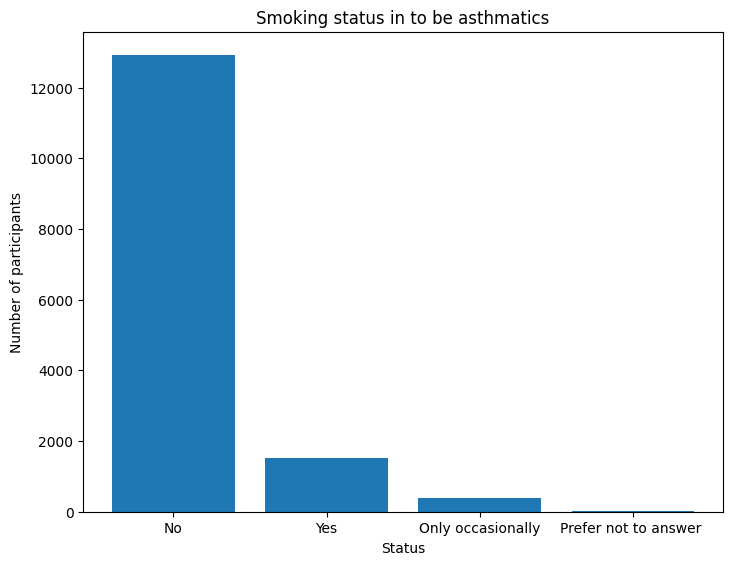

In [324]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Smoking status in to be asthmatics")
ax.set_ylabel("Number of participants")
ax.set_xlabel("Status")
labels = ["No", "Yes", "Only occasionally", "Prefer not to answer "]
data = [df["Current tobacco smoking | Instance 0"].loc[df["binary_assesment"] == 1].value_counts()["No"], 
        df["Current tobacco smoking | Instance 0"].loc[df["binary_assesment"] == 1].value_counts()["Yes, on most or all days"],
       df["Current tobacco smoking | Instance 0"].loc[df["binary_assesment"] == 1].value_counts()["Only occasionally"], 
        df["Current tobacco smoking | Instance 0"].loc[df["binary_assesment"] == 1].value_counts()["Prefer not to answer"]]
ax.bar(labels,data)

No noticeable difference in smoking status distributions.
This does not, however, imply smoking does not induce asthma, may be underlaying mechanism (e.g. smoking might worsen symptomes).

#### Blood neutrophil

(array([2.8500e+02, 3.6000e+02, 1.1660e+03, 6.0320e+03, 2.0154e+04,
        4.2652e+04, 6.1771e+04, 6.8355e+04, 6.1456e+04, 4.8090e+04,
        3.4252e+04, 2.3068e+04, 1.4578e+04, 9.2330e+03, 5.6680e+03,
        3.4800e+03, 2.2680e+03, 1.3600e+03, 9.3200e+02, 5.7300e+02,
        3.7100e+02, 2.7100e+02, 1.7900e+02, 1.1300e+02, 8.0000e+01,
        6.5000e+01, 3.5000e+01, 1.9000e+01, 2.1000e+01]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5]),
 <BarContainer object of 29 artists>)

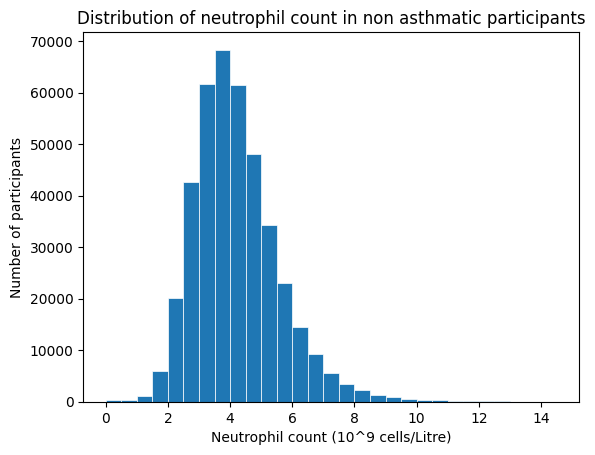

In [341]:
fig, ax = plt.subplots()
plt.title("Distribution of neutrophil count in non asthmatic participants")
plt.xlabel("Neutrophil count (10^9 cells/Litre)")
plt.ylabel("Number of participants")
ax.hist(df["Neutrophill count | Instance 0"].loc[df["asthma_binary"] == 0] ,bins=list(np.arange(0,15,0.5)), linewidth=0.5, edgecolor="white")

(array([   66.,    65.,   175.,   821.,  2798.,  6311.,  9326., 10733.,
        10347.,  8536.,  6730.,  4731.,  3212.,  2145.,  1378.,   914.,
          611.,   416.,   270.,   169.,   122.,    82.,    47.,    44.,
           31.,    19.,    18.,    12.,    11.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5]),
 <BarContainer object of 29 artists>)

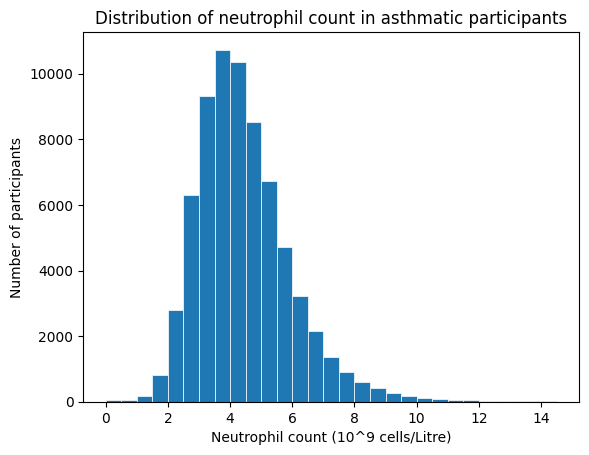

In [340]:
fig, ax = plt.subplots()
plt.title("Distribution of neutrophil count in asthmatic participants")
plt.xlabel("Neutrophil count (10^9 cells/Litre)")
plt.ylabel("Number of participants")
ax.hist(df["Neutrophill count | Instance 0"].loc[df["asthma_binary"] == 1] ,bins=list(np.arange(0,15,0.5)), linewidth=0.5, edgecolor="white")

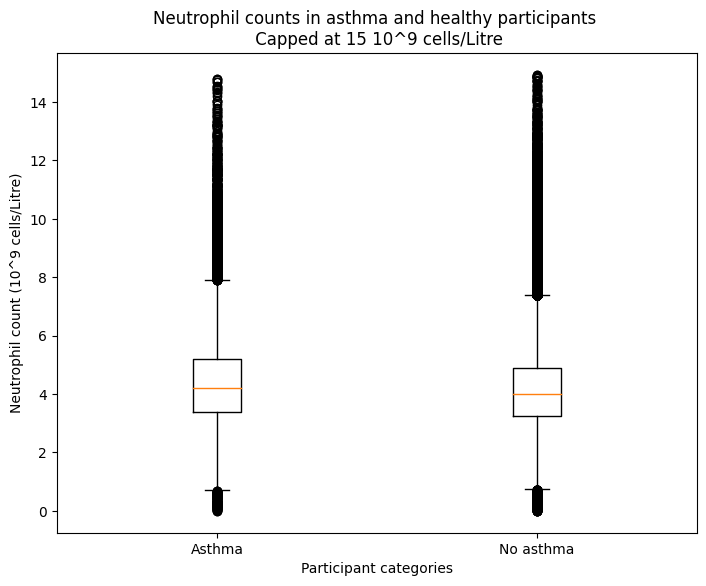

In [351]:
data = [[x for x in df["Neutrophill count | Instance 0"].loc[df["asthma_binary"] == 1].tolist() if str(x) != 'nan' and x<15], [x for x in df["Neutrophill count | Instance 0"].loc[df["asthma_binary"] == 0].tolist() if str(x) != 'nan' and x<15]]
fig = plt.figure()
        
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Neutrophil counts in asthma and healthy participants \n Capped at 15 10^9 cells/Litre")
ax.set_ylabel("Neutrophil count (10^9 cells/Litre)")
ax.set_xlabel("Participant categories")
# Creating plot
bp = ax.boxplot(data, labels=['Asthma', 'No asthma'])

(array([5.3000e+01, 5.3000e+01, 6.8000e+01, 5.1000e+01, 5.6000e+01,
        6.4000e+01, 7.2000e+01, 6.4000e+01, 5.5000e+01, 7.3000e+01,
        8.6000e+01, 7.9000e+01, 8.4000e+01, 1.2100e+02, 1.7700e+02,
        2.4900e+02, 3.5900e+02, 5.3700e+02, 8.4800e+02, 1.3390e+03,
        2.2590e+03, 3.5220e+03, 5.7260e+03, 8.6650e+03, 1.2425e+04,
        1.7760e+04, 2.3107e+04, 2.9207e+04, 3.4730e+04, 3.8859e+04,
        4.0404e+04, 3.9657e+04, 3.6711e+04, 3.1704e+04, 2.5366e+04,
        1.8952e+04, 1.2906e+04, 8.5220e+03, 5.2130e+03, 3.0120e+03,
        1.7200e+03, 9.2700e+02, 4.6300e+02, 2.9700e+02, 1.9500e+02,
        1.0800e+02, 5.1000e+01, 1.6000e+01, 3.0000e+00]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50.,
        52., 54., 56., 58., 60., 62., 64., 66., 68., 70., 72., 74., 76.,
        78., 80., 82., 84., 86., 88., 90., 92., 94., 96., 98.]),
 <BarContainer object of 49 artists>)

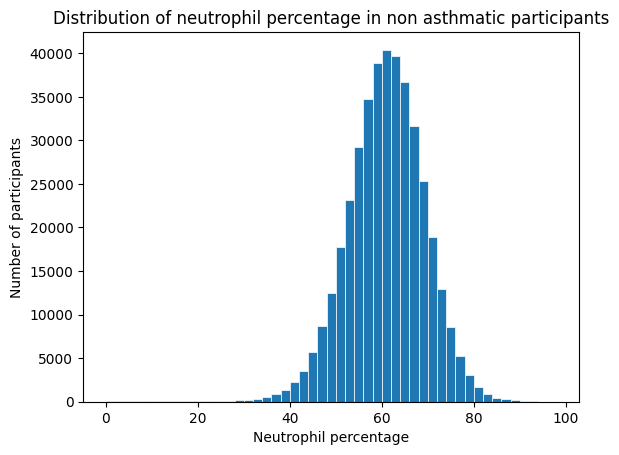

In [346]:
fig, ax = plt.subplots()
plt.title("Distribution of neutrophil percentage in non asthmatic participants")
plt.xlabel("Neutrophil percentage")
plt.ylabel("Number of participants")
ax.hist(df["Neutrophill percentage | Instance 0"].loc[df["asthma_binary"] == 0] ,bins=list(np.arange(0,100,2)), linewidth=0.5, edgecolor="white")

(array([9.000e+00, 1.400e+01, 1.200e+01, 1.200e+01, 1.500e+01, 1.300e+01,
        7.000e+00, 1.400e+01, 1.100e+01, 8.000e+00, 1.900e+01, 1.100e+01,
        1.700e+01, 2.600e+01, 3.700e+01, 3.100e+01, 5.600e+01, 8.800e+01,
        1.530e+02, 2.360e+02, 3.740e+02, 5.870e+02, 9.400e+02, 1.488e+03,
        2.093e+03, 2.890e+03, 3.885e+03, 4.868e+03, 5.730e+03, 6.354e+03,
        6.814e+03, 6.816e+03, 6.266e+03, 5.594e+03, 4.513e+03, 3.377e+03,
        2.518e+03, 1.681e+03, 1.023e+03, 6.360e+02, 3.630e+02, 2.060e+02,
        1.420e+02, 8.000e+01, 5.700e+01, 4.900e+01, 2.000e+01, 8.000e+00,
        3.000e+00]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50.,
        52., 54., 56., 58., 60., 62., 64., 66., 68., 70., 72., 74., 76.,
        78., 80., 82., 84., 86., 88., 90., 92., 94., 96., 98.]),
 <BarContainer object of 49 artists>)

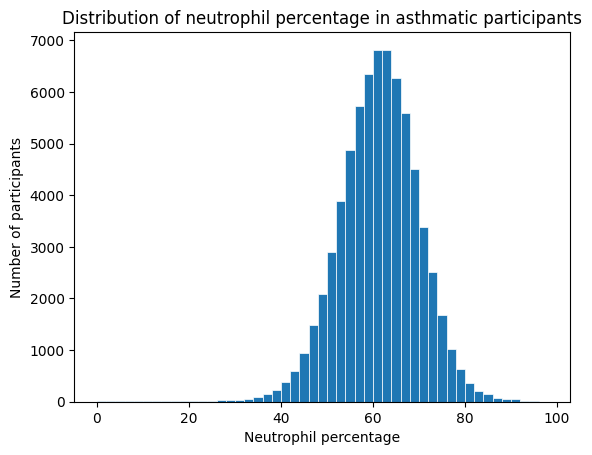

In [347]:
fig, ax = plt.subplots()
plt.title("Distribution of neutrophil percentage in asthmatic participants")
plt.xlabel("Neutrophil percentage")
plt.ylabel("Number of participants")
ax.hist(df["Neutrophill percentage | Instance 0"].loc[df["asthma_binary"] == 1] ,bins=list(np.arange(0,100,2)), linewidth=0.5, edgecolor="white")

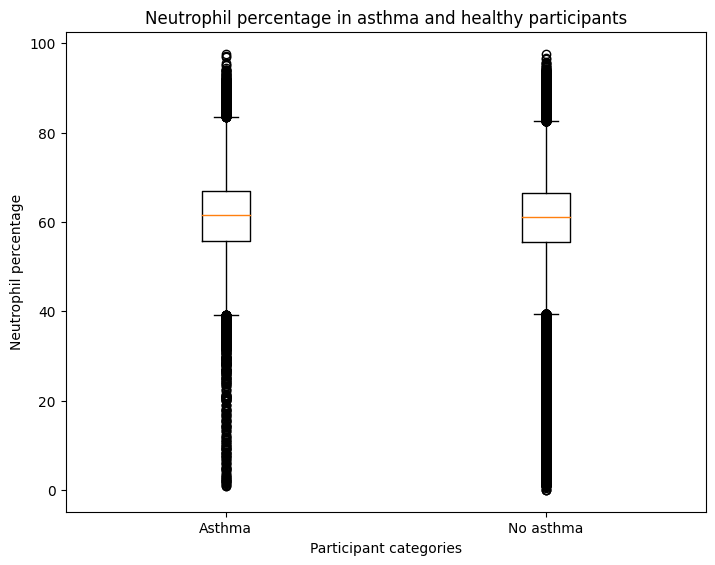

In [352]:
data = [[x for x in df["Neutrophill percentage | Instance 0"].loc[df["asthma_binary"] == 1].tolist() if str(x) != 'nan'], [x for x in df["Neutrophill percentage | Instance 0"].loc[df["asthma_binary"] == 0].tolist() if str(x) != 'nan']]
fig = plt.figure()
        
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Neutrophil percentage in asthma and healthy participants")
ax.set_ylabel("Neutrophil percentage")
ax.set_xlabel("Participant categories")
# Creating plot
bp = ax.boxplot(data, labels=['Asthma', 'No asthma'])

Very similar

#### Neutrophil and eosinophil

Text(0, 0.5, 'Neutrophil count (10^9 cells/Litre)')

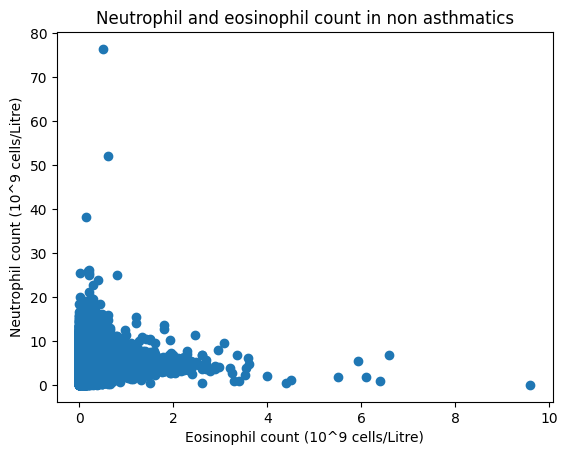

In [355]:
plt.scatter(df["Eosinophill count | Instance 0"].loc[df["asthma_binary"] == 0].tolist(), 
            df["Neutrophill count | Instance 0"].loc[df["asthma_binary"] == 0].tolist())
plt.title("Neutrophil and eosinophil count in non asthmatics")
plt.xlabel("Eosinophil count (10^9 cells/Litre)")
plt.ylabel("Neutrophil count (10^9 cells/Litre)")

Text(0, 0.5, 'Neutrophil count (10^9 cells/Litre)')

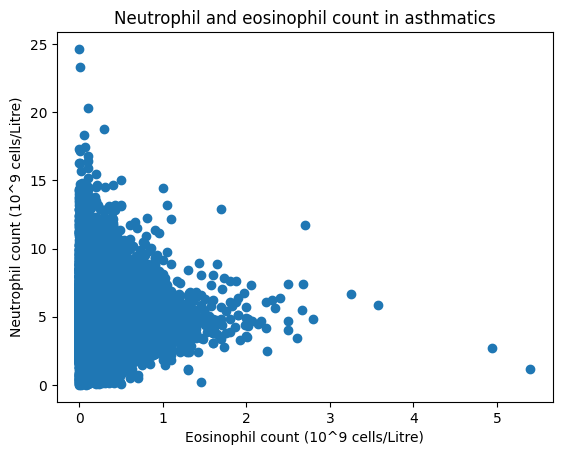

In [356]:
plt.scatter(df["Eosinophill count | Instance 0"].loc[df["asthma_binary"] == 1].tolist(), 
            df["Neutrophill count | Instance 0"].loc[df["asthma_binary"] == 1].tolist())
plt.title("Neutrophil and eosinophil count in asthmatics")
plt.xlabel("Eosinophil count (10^9 cells/Litre)")
plt.ylabel("Neutrophil count (10^9 cells/Litre)")

to be asthmatics

Text(0, 0.5, 'Neutrophil count (10^9 cells/Litre)')

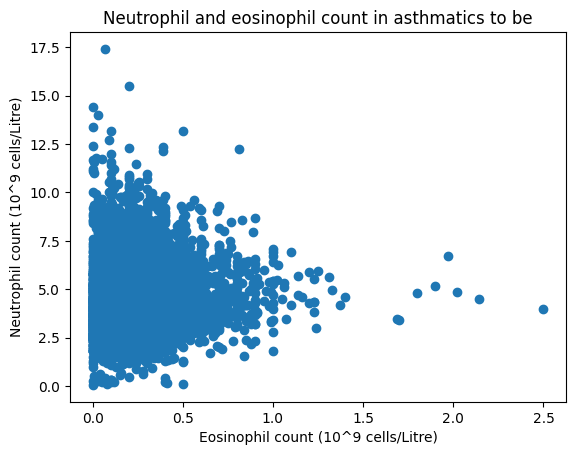

In [362]:
plt.scatter(df["Eosinophill count | Instance 0"].loc[df["binary_assesment"] == 1].tolist(), 
            df["Neutrophill count | Instance 0"].loc[df["binary_assesment"] == 1].tolist())
plt.title("Neutrophil and eosinophil count in asthmatics to be")
plt.xlabel("Eosinophil count (10^9 cells/Litre)")
plt.ylabel("Neutrophil count (10^9 cells/Litre)")

(array([1.800e+01, 8.000e+00, 3.400e+01, 1.810e+02, 5.570e+02, 1.293e+03,
        1.865e+03, 2.220e+03, 2.102e+03, 1.752e+03, 1.308e+03, 9.250e+02,
        6.460e+02, 4.100e+02, 2.560e+02, 1.570e+02, 9.900e+01, 8.000e+01,
        5.200e+01, 2.700e+01, 1.700e+01, 8.000e+00, 7.000e+00, 6.000e+00,
        5.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 2.000e+00]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5]),
 <BarContainer object of 29 artists>)

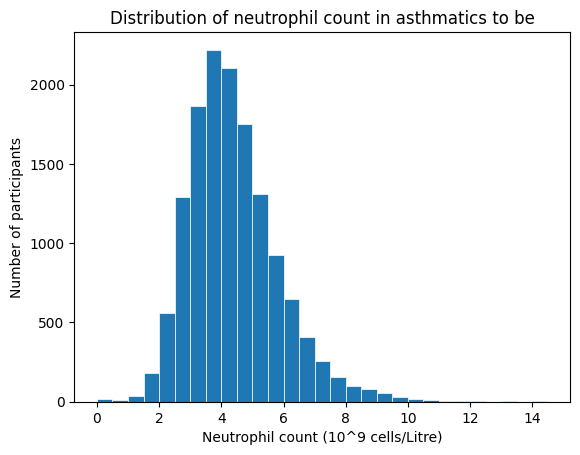

In [373]:
fig, ax = plt.subplots()
plt.title("Distribution of neutrophil count in asthmatics to be")
plt.xlabel("Neutrophil count (10^9 cells/Litre)")
plt.ylabel("Number of participants")
ax.hist(df["Neutrophill count | Instance 0"].loc[df["binary_assesment"] == 1] ,bins=list(np.arange(0,15,0.5)), linewidth=0.5, edgecolor="white")

(array([ 629., 1475., 4071., 1157., 2590., 1701.,  547.,  304.,  596.,
         175.,  310.,  185.,   45.,   83.,   31.,   22.,   36.,   15.,
          19.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
 <BarContainer object of 19 artists>)

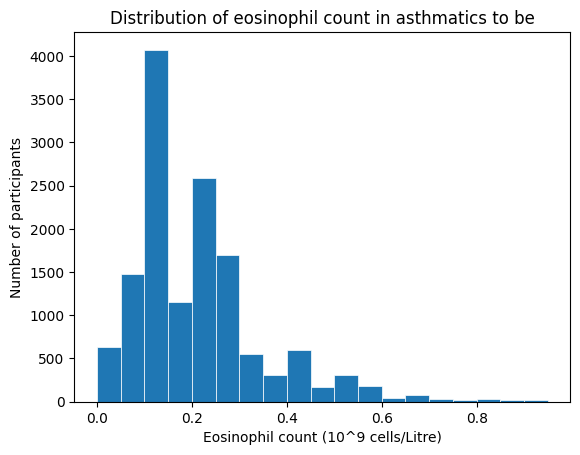

In [372]:
fig, ax = plt.subplots()
plt.title("Distribution of eosinophil count in asthmatics to be")
plt.xlabel("Eosinophil count (10^9 cells/Litre)")
plt.ylabel("Number of participants")
ax.hist(df["Eosinophill count | Instance 0"].loc[df["binary_assesment"] == 1] ,bins=list(np.arange(0,1,0.05)), linewidth=0.5, edgecolor="white")

Age and wbc

Text(0, 0.5, 'Neutrophil count (10^9 cells/Litre)')

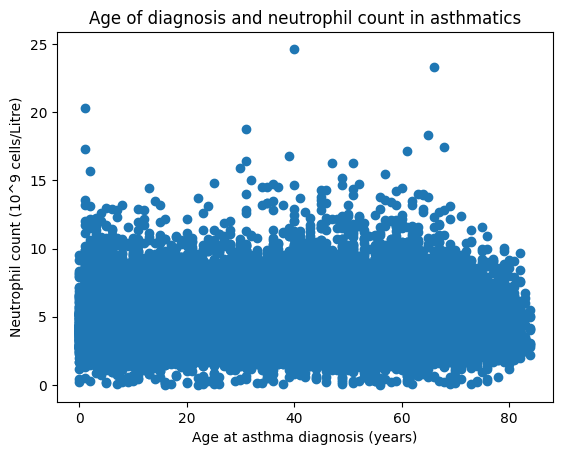

In [368]:
plt.scatter(df["age_asthma"].loc[df["asthma_binary"] == 1].tolist(), 
            df["Neutrophill count | Instance 0"].loc[df["asthma_binary"] == 1].tolist())
plt.title("Age of diagnosis and neutrophil count in asthmatics")
plt.xlabel("Age at asthma diagnosis (years)")
plt.ylabel("Neutrophil count (10^9 cells/Litre)")

Text(0, 0.5, 'Eosinophill  count (10^9 cells/Litre)')

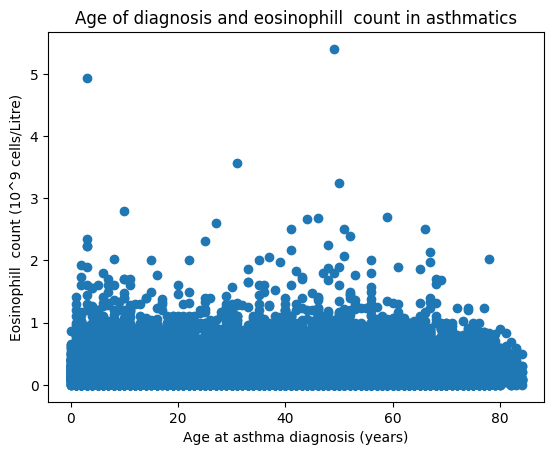

In [371]:
plt.scatter(df["age_asthma"].loc[df["asthma_binary"] == 1].tolist(), 
            df["Eosinophill count | Instance 0"].loc[df["asthma_binary"] == 1].tolist())
plt.title("Age of diagnosis and eosinophill count in asthmatics")
plt.xlabel("Age at asthma diagnosis (years)")
plt.ylabel("Eosinophill  count (10^9 cells/Litre)")

WBC and wheezing

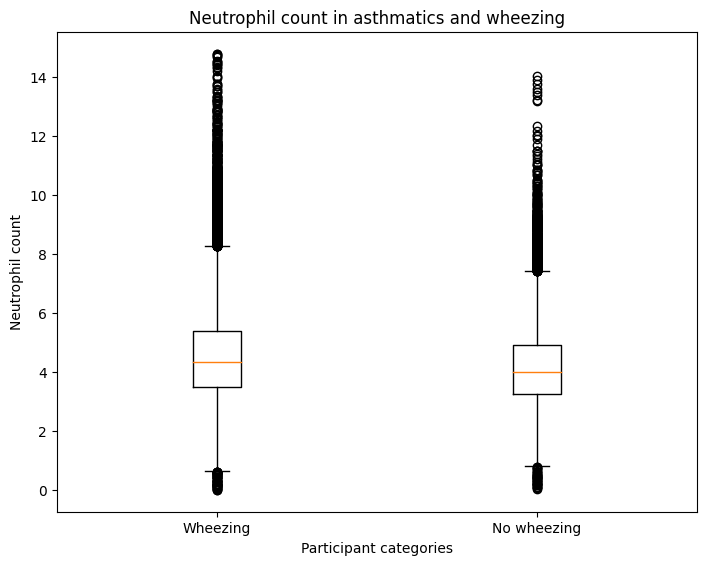

In [378]:
data = [[x for x in df["Neutrophill count | Instance 0"].loc[((df["Wheeze or whistling in the chest in last year | Instance 0"] == "Yes") & (df["asthma_binary"] == 1))].tolist() if str(x) != 'nan' and x <15], [x for x in df["Neutrophill count | Instance 0"].loc[((df["Wheeze or whistling in the chest in last year | Instance 0"] == "No" ) & (df["asthma_binary"] == 1))].tolist() if str(x) != 'nan' and x <15]]
fig = plt.figure()
        
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Neutrophil count in asthmatics and wheezing")
ax.set_ylabel("Neutrophil count")
ax.set_xlabel("Participant categories")
# Creating plot
bp = ax.boxplot(data, labels=['Wheezing', 'No wheezing'])

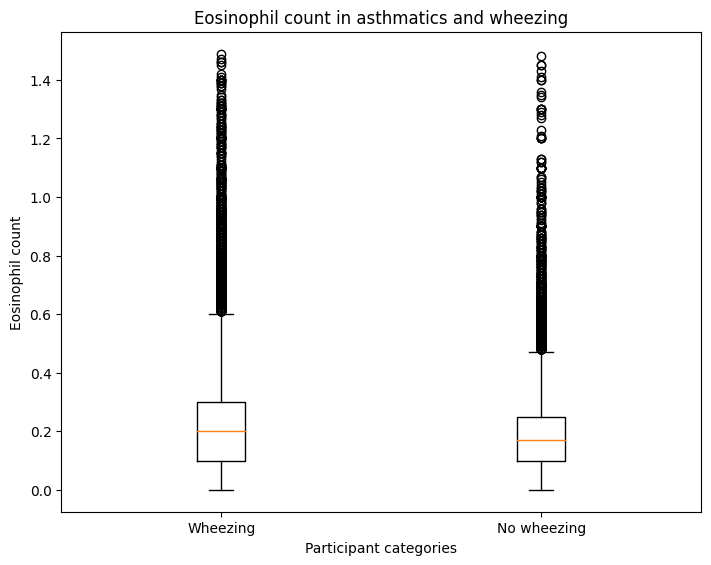

In [381]:
data = [[x for x in df["Eosinophill count | Instance 0"].loc[((df["Wheeze or whistling in the chest in last year | Instance 0"] == "Yes") & (df["asthma_binary"] == 1))].tolist() if str(x) != 'nan' and x <1.5], 
        [x for x in df["Eosinophill count | Instance 0"].loc[((df["Wheeze or whistling in the chest in last year | Instance 0"] == "No" ) & (df["asthma_binary"] == 1))].tolist() if str(x) != 'nan' and x <1.5]]
fig = plt.figure()
        
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Eosinophil count in asthmatics and wheezing")
ax.set_ylabel("Eosinophil count")
ax.set_xlabel("Participant categories")
# Creating plot
bp = ax.boxplot(data, labels=['Wheezing', 'No wheezing'])

Difference to be seen in the right tail of distributions

#### Obesity and asthma

In [382]:
#obtain data
df = df.merge(pd.read_csv("C:/Users/keimp/NHS/Data_files/Grouped_files/replace/Body_measures.csv"), on="Participant ID")

(array([3.0000e+00, 3.0000e+00, 4.0000e+00, 9.0000e+00, 3.0000e+01,
        4.9000e+01, 1.1900e+02, 2.2300e+02, 5.3400e+02, 1.0220e+03,
        2.0020e+03, 3.2850e+03, 5.4790e+03, 7.6750e+03, 1.0610e+04,
        1.3617e+04, 1.6965e+04, 2.0018e+04, 2.2489e+04, 2.4767e+04,
        2.5856e+04, 2.6690e+04, 2.6564e+04, 2.5240e+04, 2.3642e+04,
        2.1981e+04, 2.0021e+04, 1.7978e+04, 1.5687e+04, 1.3849e+04,
        1.1958e+04, 1.0148e+04, 8.7440e+03, 7.3890e+03, 6.2080e+03,
        5.2690e+03, 4.6180e+03, 3.8300e+03, 3.2160e+03, 2.7890e+03,
        2.3110e+03, 1.9500e+03, 1.6270e+03, 1.4430e+03, 1.1680e+03,
        1.0290e+03, 9.0000e+02, 7.0200e+02, 6.4600e+02, 5.3100e+02,
        4.4500e+02, 3.7700e+02, 3.3300e+02, 2.3800e+02, 2.2600e+02,
        1.9200e+02, 1.4800e+02, 1.4900e+02, 1.1100e+02, 8.6000e+01,
        8.1000e+01, 5.2000e+01, 4.1000e+01, 5.8000e+01, 4.8000e+01,
        3.2000e+01, 3.3000e+01, 2.8000e+01, 1.0000e+01, 1.6000e+01,
        1.2000e+01, 1.3000e+01, 1.0000e+01, 1.00

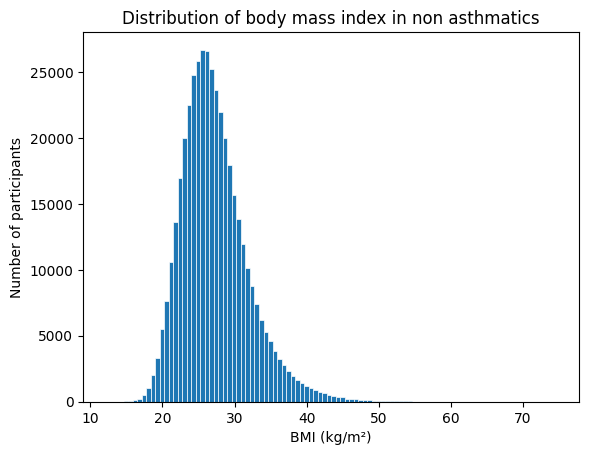

In [388]:
fig, ax = plt.subplots()
plt.title("Distribution of body mass index in non asthmatics")
plt.xlabel("BMI (kg/m²)")
plt.ylabel("Number of participants")
ax.hist(df["Body mass index (BMI) | Instance 0"].loc[df["asthma_binary"] == 0] ,bins=100, linewidth=0.5, edgecolor="white")

(array([1.000e+00, 2.000e+00, 2.000e+00, 4.000e+00, 7.000e+00, 1.300e+01,
        3.600e+01, 5.700e+01, 1.000e+02, 1.880e+02, 3.120e+02, 5.000e+02,
        7.770e+02, 9.800e+02, 1.355e+03, 1.686e+03, 2.083e+03, 2.376e+03,
        2.766e+03, 3.151e+03, 3.409e+03, 3.572e+03, 3.656e+03, 3.668e+03,
        3.687e+03, 3.629e+03, 3.360e+03, 3.184e+03, 2.962e+03, 2.713e+03,
        2.483e+03, 2.212e+03, 2.083e+03, 1.884e+03, 1.637e+03, 1.469e+03,
        1.281e+03, 1.175e+03, 1.120e+03, 8.660e+02, 7.950e+02, 7.290e+02,
        6.410e+02, 6.080e+02, 5.450e+02, 4.380e+02, 3.830e+02, 3.600e+02,
        3.060e+02, 2.740e+02, 2.390e+02, 2.180e+02, 1.880e+02, 1.690e+02,
        1.410e+02, 1.230e+02, 9.700e+01, 1.130e+02, 9.600e+01, 7.800e+01,
        9.400e+01, 6.600e+01, 4.900e+01, 4.000e+01, 5.300e+01, 3.900e+01,
        2.200e+01, 2.400e+01, 2.100e+01, 2.300e+01, 1.900e+01, 1.100e+01,
        1.400e+01, 1.300e+01, 5.000e+00, 1.200e+01, 1.100e+01, 1.000e+01,
        2.000e+00, 5.000e+00, 4.000e+0

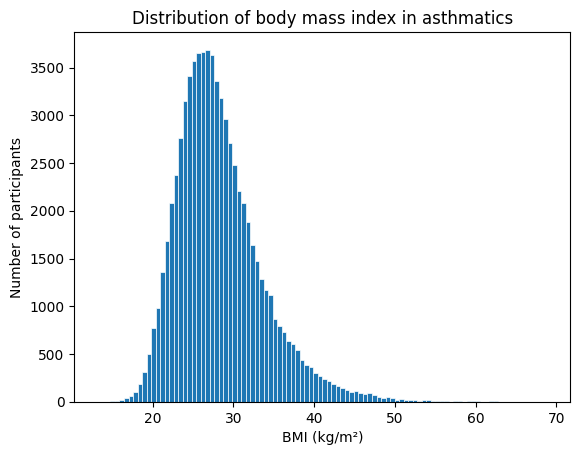

In [389]:
fig, ax = plt.subplots()
plt.title("Distribution of body mass index in asthmatics")
plt.xlabel("BMI (kg/m²)")
plt.ylabel("Number of participants")
ax.hist(df["Body mass index (BMI) | Instance 0"].loc[df["asthma_binary"] == 1] ,bins=100, linewidth=0.5, edgecolor="white")

Again larger right side tail:
Testing women obesity hypothesis

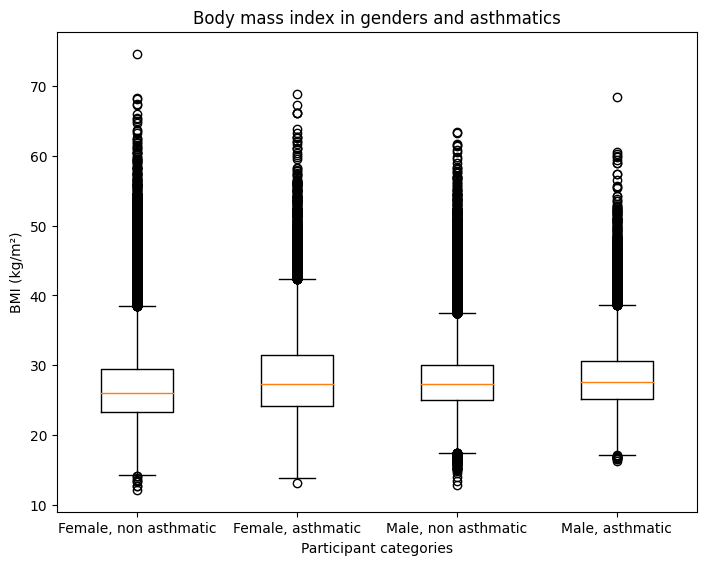

In [391]:
data = [[x for x in df["Body mass index (BMI) | Instance 0"].loc[((df["Sex"] == "Female") & (df["asthma_binary"] == 0))].tolist() if str(x) != 'nan' ], 
        [x for x in df["Body mass index (BMI) | Instance 0"].loc[((df["Sex"] == "Female" ) & (df["asthma_binary"] == 1))].tolist() if str(x) != 'nan' ],
       [x for x in df["Body mass index (BMI) | Instance 0"].loc[((df["Sex"] == "Male" ) & (df["asthma_binary"] == 0))].tolist() if str(x) != 'nan' ],
       [x for x in df["Body mass index (BMI) | Instance 0"].loc[((df["Sex"] == "Male" ) & (df["asthma_binary"] == 1))].tolist() if str(x) != 'nan' ]]
fig = plt.figure()
        
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
ax.set_title("Body mass index in genders and asthmatics")
ax.set_ylabel("BMI (kg/m²)")
ax.set_xlabel("Participant categories")
# Creating plot
bp = ax.boxplot(data, labels=['Female, non asthmatic', 'Female, asthmatic', "Male, non asthmatic", "Male, asthmatic"])

Larger difference between women

Text(0, 0.5, 'Neutrophil count (10^9 cells/Litre)')

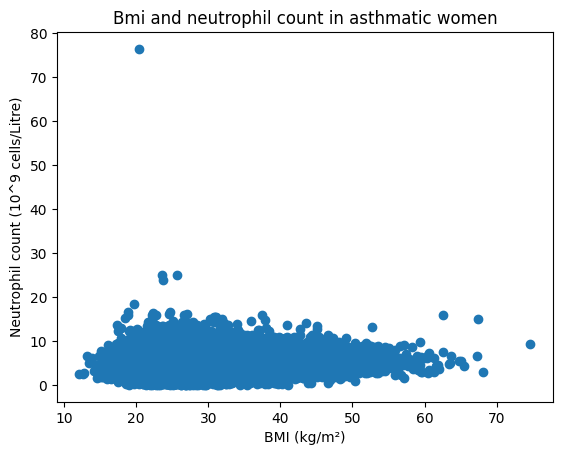

In [396]:
plt.scatter(df["Body mass index (BMI) | Instance 0"].loc[((df["Sex"] == "Female") & (df["asthma_binary"] == 0))].tolist(), 
            df["Neutrophill count | Instance 0"].loc[((df["Sex"] == "Female") & (df["asthma_binary"] == 0))].tolist())
plt.title("Bmi and neutrophil count in asthmatic women")
plt.xlabel("BMI (kg/m²)")
plt.ylabel("Neutrophil count (10^9 cells/Litre)")

Text(0, 0.5, 'Neutrophil count (10^9 cells/Litre)')

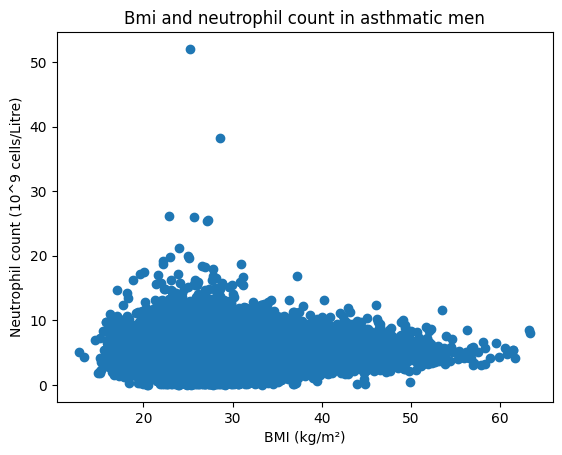

In [397]:
plt.scatter(df["Body mass index (BMI) | Instance 0"].loc[((df["Sex"] == "Male") & (df["asthma_binary"] == 0))].tolist(), 
            df["Neutrophill count | Instance 0"].loc[((df["Sex"] == "Male") & (df["asthma_binary"] == 0))].tolist())
plt.title("Bmi and neutrophil count in asthmatic men")
plt.xlabel("BMI (kg/m²)")
plt.ylabel("Neutrophil count (10^9 cells/Litre)")

Text(0, 0.5, 'Eosinophill count (10^9 cells/Litre)')

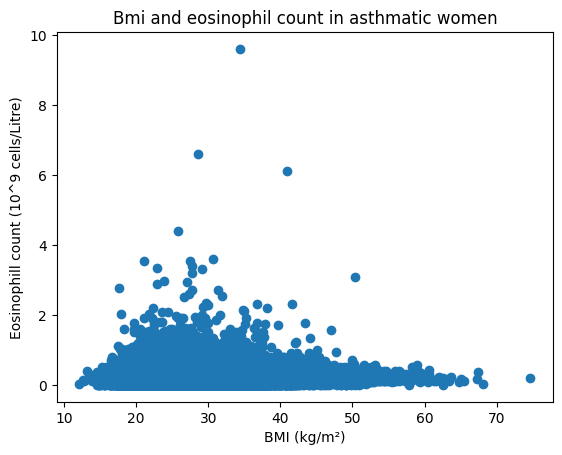

In [400]:
plt.scatter(df["Body mass index (BMI) | Instance 0"].loc[((df["Sex"] == "Female") & (df["asthma_binary"] == 0))].tolist(), 
            df["Eosinophill count | Instance 0"].loc[((df["Sex"] == "Female") & (df["asthma_binary"] == 0))].tolist())
plt.title("Bmi and eosinophil count in asthmatic women")
plt.xlabel("BMI (kg/m²)")
plt.ylabel("Eosinophill count (10^9 cells/Litre)")

Text(0, 0.5, 'Eosinophill count (10^9 cells/Litre)')

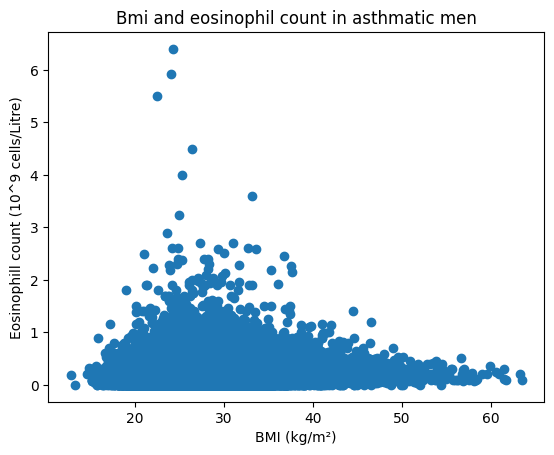

In [401]:
plt.scatter(df["Body mass index (BMI) | Instance 0"].loc[((df["Sex"] == "Male") & (df["asthma_binary"] == 0))].tolist(), 
            df["Eosinophill count | Instance 0"].loc[((df["Sex"] == "Male") & (df["asthma_binary"] == 0))].tolist())
plt.title("Bmi and eosinophil count in asthmatic men")
plt.xlabel("BMI (kg/m²)")
plt.ylabel("Eosinophill count (10^9 cells/Litre)")